In [215]:
import requests
from requests.auth import HTTPBasicAuth

from io import StringIO
import time
import pandas as pd

import matplotlib.pyplot as plt

In [229]:
IP = "192.168.1.29"
USER = "root"
PASSWORD = "root"
TIMEZONE_OFFSET = (time.localtime().tm_hour - time.gmtime().tm_hour) * 3600

def get_day_data_url(day_number):
    return "http://" + IP + "/arch/2020/07/ARCH" + str(day_number).zfill(2) + ".CSV"

def process_day_data(day_data):
    day_data = day_data.decode()
    day_data = StringIO(day_data)
    day_data = pd.read_csv(day_data, ";")
    # day_data.datetime = pd.to_datetime(day_data.datetime + TIMEZONE_OFFSET, unit="s") # convert dates
    day_data = day_data.iloc[:, :-1] # remove last unnamed column
    return day_data

def download_data(fist_day, last_day):
    days_data = []
    for i in range(fist_day, last_day + 1):
        try:
            print("Downloading day", i, "\t", end="")
            response = requests.get(get_day_data_url(i), auth=HTTPBasicAuth(USER, PASSWORD), timeout=1)
            response.raise_for_status()
            day_data = process_day_data(response.content)
            days_data.append(day_data)
            print(day_data.shape[0] - 1, "lines")
        except requests.exceptions.HTTPError as e:
            print(e)
        except requests.exceptions.Timeout:
            print("Timeout!")
        except requests.exceptions.RequestException as e:
            print("Unexpected error occured!:", e)
    return days_data


In [230]:
a = download_data(0,30)

In [231]:
a[-1]

,datetime,tkot_value,tpow_value,tpod_value,tcwu_value,twew_value,tzew_value,t1_value,t2_value,tsp_value,...,ob5_zaw4d_tzad,ob5_zaw4d_pos,ob5_t1,ob5_t2,ob6_pok_tact,ob6_pok_tzad,ob6_zaw4d_tzad,ob6_zaw4d_pos,ob6_t1,ob6_t2
0,1594166400,56.93,51.25,38.86,53.75,24.35,17.10,28.73,NaN,51.29,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,1594166460,56.96,51.27,38.91,53.75,24.35,17.10,28.71,NaN,51.07,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,1594166520,56.98,51.31,38.98,53.80,24.35,17.09,28.70,NaN,50.95,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,1594166580,57.02,51.32,39.04,53.81,24.35,17.06,28.71,NaN,50.83,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,1594166640,57.04,51.36,39.10,53.85,24.36,17.06,28.72,NaN,50.58,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1594226520,55.69,50.79,37.30,54.97,23.42,18.24,49.66,NaN,52.62,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1003,1594226580,55.69,50.88,37.42,54.97,23.41,18.24,49.63,NaN,52.02,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1004,1594226640,55.71,50.93,37.54,55.00,23.40,18.24,49.63,NaN,51.41,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1005,1594226700,55.74,50.97,37.65,55.01,23.40,18.25,49.62,NaN,50.97,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [232]:
a[-1].columns

Index(['datetime', 'tkot_value', 'tpow_value', 'tpod_value', 'tcwu_value',
       'twew_value', 'tzew_value', 't1_value', 't2_value', 'tsp_value',
       'tzew_act', 'kot_tact', 'ob1_pok_tact', 'ob1_pok_tzad',
       'ob1_zaw4d_tzad', 'ob1_zaw4d_pos', 'ob2_pok_tact', 'ob2_pok_tzad',
       'cwu_tact', 'ob3_pok_tact', 'ob3_pok_tzad', 'ob3_zaw4d_tzad',
       'ob3_zaw4d_pos', 'ob3_t1', 'ob3_t2', 'ob4_pok_tact', 'ob4_pok_tzad',
       'ob4_zaw4d_tzad', 'ob4_zaw4d_pos', 'ob4_t1', 'ob4_t2', 'ob5_pok_tact',
       'ob5_pok_tzad', 'ob5_zaw4d_tzad', 'ob5_zaw4d_pos', 'ob5_t1', 'ob5_t2',
       'ob6_pok_tact', 'ob6_pok_tzad', 'ob6_zaw4d_tzad', 'ob6_zaw4d_pos',
       'ob6_t1', 'ob6_t2'],
      dtype='object')

In [233]:
labels = ["datetime", "Temperatura kotła", "Temperatura powrotu", "Temperatura podajnika", "Temperatura CWU", "", "Temperatura zewnętrzna", ""]

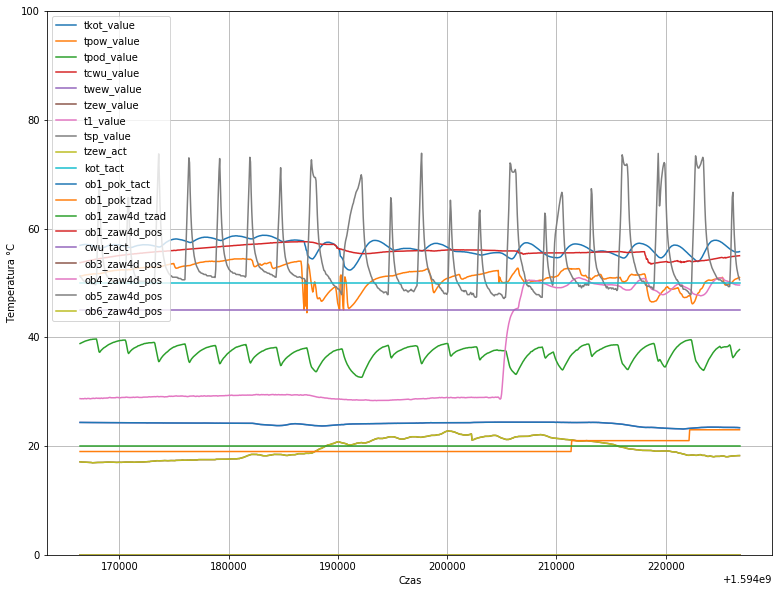

In [289]:
plt.figure(figsize=(13, 10))
plt.xlabel("Czas")
plt.ylabel("Temperatura °C")
plt.ylim([0, 100])
plt.grid()
for i in range(1, a[-1].shape[1]):
    if not pd.isnull(a[-1].iloc[0, i]):
        plt.plot(a[-1].iloc[:, 0], a[-1].iloc[:, i], label=a[-1].columns[i])
plt.legend()